# Analyse du risque de défaillance des joints toriques de la navette Challenger

Le 27 Janvier 1986, veille du décollage de la navette *Challenger*, eu
lieu une télé-conférence de trois heures entre les ingénieurs de la
Morton Thiokol (constructeur d'un des moteurs) et de la NASA. La
discussion portait principalement sur les conséquences de la
température prévue au moment du décollage de 31°F (juste en dessous de
0°C) sur le succès du vol et en particulier sur la performance des
joints toriques utilisés dans les moteurs. En effet, aucun test
n'avait été effectué à cette température.

L'étude qui suit reprend donc une partie des analyses effectuées cette
nuit là et dont l'objectif était d'évaluer l'influence potentielle de
la température et de la pression à laquelle sont soumis les joints
toriques sur leur probabilité de dysfonctionnement. Pour cela, nous
disposons des résultats des expériences réalisées par les ingénieurs
de la NASA durant les 6 années précédant le lancement de la navette
Challenger.



## Chargement des données
Nous commençons donc par charger ces données:

In [1]:
import numpy as np
import pandas as pd
data_init = pd.read_csv("shuttle.csv")
data_init

Date  Count  Temperature  Pressure  Malfunction
0    4/12/81      6           66        50            0
1   11/12/81      6           70        50            1
2    3/22/82      6           69        50            0
3   11/11/82      6           68        50            0
4    4/04/83      6           67        50            0
5    6/18/82      6           72        50            0
6    8/30/83      6           73       100            0
7   11/28/83      6           70       100            0
8    2/03/84      6           57       200            1
9    4/06/84      6           63       200            1
10   8/30/84      6           70       200            1
11  10/05/84      6           78       200            0
12  11/08/84      6           67       200            0
13   1/24/85      6           53       200            2
14   4/12/85      6           67       200            0
15   4/29/85      6           75       200            0
16   6/17/85      6           70       200            0
17   7/29/85      6           81       200            0
18   8/27/85      6           76       200            0
19  10/03/85      6           79       200            0
20  10/30/85      6           75       200            2
21  11/26/85      6           76       200            0
22   1/12/86      6           58       200            1

Le jeu de données nous indique la date de l'essai, le nombre de joints
toriques mesurés (il y en a 6 sur le lançeur principal), la
température (en Farenheit) et la pression (en psi), et enfin le
nombre de dysfonctionnements relevés. 

## Inspection graphique des données
Les vols où aucun incident n'est relevé n'apportant aucun information
sur l'influence de la température ou de la pression sur les
dysfonctionnements, nous nous concentrons sur les expériences où au
moins un joint a été défectueux.


In [2]:
data_cropped_malfunction = data_init[data_init.Malfunction>0]
data_cropped_malfunction

Date  Count  Temperature  Pressure  Malfunction
1   11/12/81      6           70        50            1
8    2/03/84      6           57       200            1
9    4/06/84      6           63       200            1
10   8/30/84      6           70       200            1
13   1/24/85      6           53       200            2
20  10/30/85      6           75       200            2
22   1/12/86      6           58       200            1

Très bien, nous avons une variabilité de température importante mais
la pression est quasiment toujours égale à 200, ce qui devrait
simplifier l'analyse.

Comment la fréquence d'échecs varie-t-elle avec la température ?


data count 1     6
8     6
9     6
10    6
13    6
20    6
22    6
Name: Count, dtype: int64


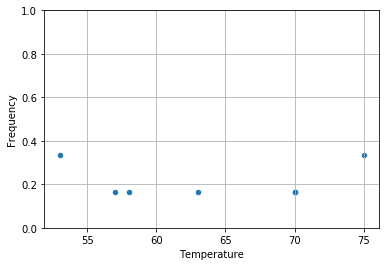

In [3]:
%matplotlib inline
pd.set_option('mode.chained_assignment',None) # this removes a useless warning from pandas
import matplotlib.pyplot as plt

data_cropped_malfunction["Frequency"]=data_cropped_malfunction.Malfunction/data_cropped_malfunction.Count
print('data count {}'.format(data_cropped_malfunction.Count))
data_cropped_malfunction.plot(x="Temperature",y="Frequency",kind="scatter",ylim=[0,1])
plt.grid(True)

À première vue et avec les hypothèses jusqu'ici retenues, ce n'est pas flagrant mais bon, essayons quand même
d'estimer l'impact de la température $t$ sur la probabilité de
dysfonctionnements d'un joint. 
Maintenant prenant en compte dans les données uniquement celles qui sont à une même pression de 200 psi sans écarter celles liées aux vols sans incidents et intéressons nous à la probabilité de défaillance d'au moins un joint parmi les 6, i.e. à la fréquence de cet évenement en fonction de la température.

In [4]:
data_cropped_pressure200 = data_init[data_init.Pressure==200]
data_cropped_pressure200

Date  Count  Temperature  Pressure  Malfunction
8    2/03/84      6           57       200            1
9    4/06/84      6           63       200            1
10   8/30/84      6           70       200            1
11  10/05/84      6           78       200            0
12  11/08/84      6           67       200            0
13   1/24/85      6           53       200            2
14   4/12/85      6           67       200            0
15   4/29/85      6           75       200            0
16   6/17/85      6           70       200            0
17   7/29/85      6           81       200            0
18   8/27/85      6           76       200            0
19  10/03/85      6           79       200            0
20  10/30/85      6           75       200            2
21  11/26/85      6           76       200            0
22   1/12/86      6           58       200            1

In [11]:
data_temp_50_60 = data_cropped_pressure200[(data_cropped_pressure200.Temperature>50) & (data_cropped_pressure200.Temperature<60)]
proba_failure_temp_50_60 = data_temp_50_60[data_temp_50_60.Malfunction>0].shape[0]/data_temp_50_60.shape[0]
print('proba_failure_temp_50_60: {}'.format(proba_failure_temp_50_60))

data_temp_60_70 = data_cropped_pressure200[(data_cropped_pressure200.Temperature>60) & (data_cropped_pressure200.Temperature<70)]
proba_failure_temp_60_70 = data_temp_60_70[data_temp_60_70.Malfunction>0].shape[0]/data_temp_60_70.shape[0]
print('proba_failure_temp_60_70: {}'.format(proba_failure_temp_60_70))


data_temp_70_80 = data_cropped_pressure200[(data_cropped_pressure200.Temperature>70) & (data_cropped_pressure200.Temperature<80)]
proba_failure_temp_70_80 = data_temp_70_80[data_temp_70_80.Malfunction>0].shape[0]/data_temp_70_80.shape[0]
print('proba_failure_temp_70_80: {}'.format(proba_failure_temp_70_80))

proba_failure_temp_50_60: 1.0
proba_failure_temp_60_70: 0.3333333333333333
proba_failure_temp_70_80: 0.16666666666666666


La fréquence d'occurence d'un problème sur l'un des joints semble augmenter fortement à mesure que a température diminue.

## Estimation de l'influence de la température

Supposons que chacun des 6 joints toriques est endommagé avec la même
probabilité et indépendamment des autres et que cette probabilité ne
dépend que de la température. Si on note $p(t)$ cette probabilité, le
nombre de joints $D$ dysfonctionnant lorsque l'on effectue le vol à
température $t$ suit une loi binomiale de paramètre $n=6$ et
$p=p(t)$. Pour relier $p(t)$ à $t$, on va donc effectuer une
régression logistique.

Réintroduction de l'erreur de l'exclusion des données des vols sans incidents

In [6]:
data = data_init[data_init.Malfunction>0]
data
data["Frequency"]=data.Malfunction/data.Count

In [7]:
import statsmodels.api as sm

data["Success"]=data.Count-data.Malfunction
data["Intercept"]=1

logmodel=sm.GLM(data['Frequency'], data[['Intercept','Temperature']], family=sm.families.Binomial(sm.families.links.logit)).fit()

logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Frequency   No. Observations:                    7
Model:                            GLM   Df Residuals:                        5
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.5250
Date:                Thu, 19 Sep 2024   Deviance:                      0.22231
Time:                        15:25:28   Pearson chi2:                    0.236
No. Iterations:                     4   Covariance Type:             nonrobust
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.3895      7.828     -0.178      0.859     -16.732      13.953
Temperature     0.0014      0.122      0.012      0.991      -0.238       0.240
===============================================================================
"""

L'estimateur le plus probable du paramètre de température est 0.0014
et l'erreur standard de cet estimateur est de 0.122, autrement dit on
ne peut pas distinguer d'impact particulier et il faut prendre nos
estimations avec des pincettes.


## Estimation de la probabilité de dysfonctionnant des joints toriques
La température prévue le jour du décollage est de 31°F. Essayons
d'estimer la probabilité de dysfonctionnement des joints toriques à
cette température à partir du modèle que nous venons de construire:


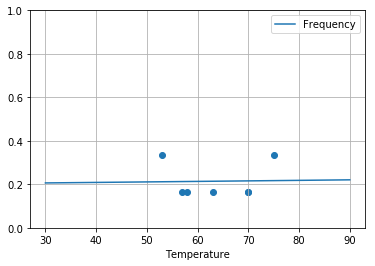

In [8]:
%matplotlib inline
data_pred = pd.DataFrame({'Temperature': np.linspace(start=30, stop=90, num=121), 'Intercept': 1})
data_pred['Frequency'] = logmodel.predict(data_pred[['Intercept','Temperature']])
data_pred.plot(x="Temperature",y="Frequency",kind="line",ylim=[0,1])
plt.scatter(x=data["Temperature"],y=data["Frequency"])
plt.grid(True)

Comme on pouvait s'attendre au vu des données initiales, la
température n'a pas d'impact notable sur la probabilité d'échec des
joints toriques. Elle sera d'environ 0.2, comme dans les essais
précédents où nous il y a eu défaillance d'au moins un joint. Revenons
à l'ensemble des données initiales pour estimer la probabilité de
défaillance d'un joint:


In [9]:
data = pd.read_csv("shuttle.csv")
print(np.sum(data.Malfunction)/np.sum(data.Count))

0.06521739130434782


Cette probabilité est donc d'environ $p=0.065$, sachant qu'il existe
un joint primaire un joint secondaire sur chacune des trois parties du
lançeur, la probabilité de défaillance des deux joints d'un lançeur
est de $p^2 \approx 0.00425$. La probabilité de défaillance d'un des
lançeur est donc de $1-(1-p^2)^3 \approx 1.2%$.  Ça serait vraiment
pas de chance... Tout est sous contrôle, le décollage peut donc avoir
lieu demain comme prévu.

Seulement, le lendemain, la navette Challenger explosera et emportera
avec elle ses sept membres d'équipages. L'opinion publique est
fortement touchée et lors de l'enquête qui suivra, la fiabilité des
joints toriques sera directement mise en cause. Au delà des problèmes
de communication interne à la NASA qui sont pour beaucoup dans ce
fiasco, l'analyse précédente comporte (au moins) un petit
problème... Saurez-vous le trouver ? Vous êtes libre de modifier cette
analyse et de regarder ce jeu de données sous tous les angles afin
d'expliquer ce qui ne va pas.